# Varaince between Sample 0 and 1

Samples 0 and 1 have been given as a mod 10 of the card number. The idea being that this should lead to a very even distribution and predictions on a smaller subset of all the data can actually be inferred across all the data.

As a test of this I have decided to look at the aggregated scans on 1 particular station, Clifton Hill.

In [81]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../MelbDatathon2018/Auth/republic_of_data_2018_linked.json"

def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [82]:
implicit()

[<Bucket: dataprep-staging-abb5d66a-134b-4c90-9774-b91f26c0f3f6>, <Bucket: republic-of-data-original-data>]


In [4]:
%load_ext google.cloud.bigquery

In [7]:
%%bigquery df_clifton_hill_by_day
    SELECT StopNameShort
  , mode
  , Sample
  , ScanType
  , EXTRACT(YEAR FROM BusinessDate) AS year
  , FinancialQuarter
  , MonthNumber
  , CalendarWeek
  , DayType
  , isSchoolHoliday
  , WeekDay
  , isLongWeekend
  , DATE(BusinessDate) as date
  , count(*) AS count
  FROM `republic-of-data-2018.clean.scans` scans
RIGHT JOIN data.stop_locations ON StopID = StopLocationID
JOIN clean.Calendar_Features cal_feat ON cal_feat.Date = scans.BusinessDate
  WHERE StopNameShort = 'Clifton Hill' AND mode = 2
  GROUP BY StopNameShort
    , mode
    , Sample
    , ScanType
    , EXTRACT(YEAR FROM BusinessDate)
    , FinancialQuarter
    , MonthNumber
    , CalendarWeek
    , DayType
    , isSchoolHoliday
    , WeekDay
    , isLongWeekend
    , BusinessDate

,StopNameShort,mode,Sample,ScanType,year,FinancialQuarter,MonthNumber,CalendarWeek,DayType,isSchoolHoliday,WeekDay,isLongWeekend,date,count
0,Clifton Hill,2,0,False,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,262
1,Clifton Hill,2,1,False,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,281
2,Clifton Hill,2,0,True,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,265
3,Clifton Hill,2,1,True,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,312
4,Clifton Hill,2,1,True,2015,FY15-16Q1,7,29,Saturday,False,Saturday,False,2015-07-25,199
5,Clifton Hill,2,1,False,2015,FY15-16Q1,7,29,Saturday,False,Saturday,False,2015-07-25,163
6,Clifton Hill,2,0,False,2015,FY15-16Q1,7,29,Saturday,False,Saturday,False,2015-07-25,153
7,Clifton Hill,2,0,True,2015,FY15-16Q1,7,29,Saturday,False,Saturday,False,2015-07-25,189
8,Clifton Hill,2,0,True,2015,FY15-16Q1,7,30,Sunday,False,Sunday,False,2015-07-26,169
9,Clifton Hill,2,1,False,2015,FY15-16Q1,7,30,Sunday,False,Sunday,False,2015-07-26,147


In [17]:
%matplotlib inline

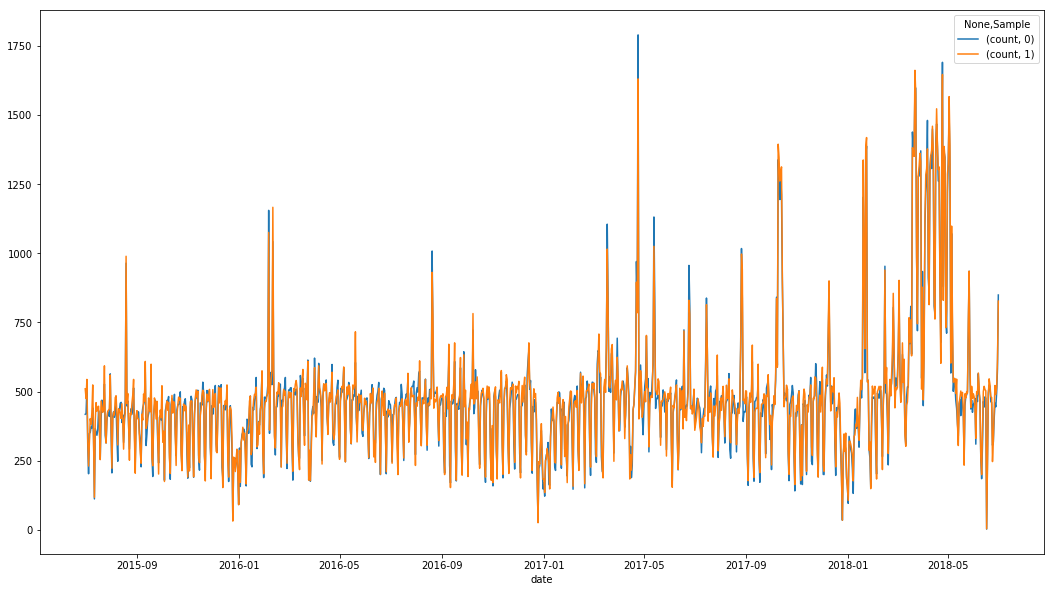

In [80]:
# import datetime as dt
# df = df_clifton_hill_by_day.loc(df_clifton_hill_by_day['date'] > dt.datetime(2018, 1, 1).date())

df = df_clifton_hill_by_day[['date', 'Sample', 'count']].groupby(['date', 'Sample']).sum().unstack()
#.pivot(columns='Sample', values=['count'])#
# df = df_clifton_hill_by_day[['date', 'Sample', 'count']].pivot(columns='Sample', values=['date', 'count'])
df.plot(figsize=(18, 10))

there is not much difference between the 0 and 1 sample as expected. More interesting seem the spikes and the lift in scan rates May 2018.